In [ ]:
#@markdown processamento inicial
import warnings
warnings.filterwarnings('ignore')
!pip install yahooquery
 
# with LSTM
!pip install stocker
!pip install yfinance
 
import pandas as pd
import numpy as np
 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
 
 
from yahooquery import Ticker
from fbprophet import Prophet
import yfinance as yf
 
import datetime as dt 
dia = dt.datetime.today().strftime(format='20%y-%m-%d')

In [ ]:
!pip freeze

absl-py==0.12.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
appdirs==1.4.4
argon2-cffi==20.1.0
astor==0.8.1
astropy==4.2
astunparse==1.6.3
async-generator==1.10
atari-py==0.2.6
atomicwrites==1.4.0
attrs==20.3.0
audioread==2.1.9
autograd==1.3
Babel==2.9.0
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==3.3.0
blis==0.4.1
bokeh==2.3.0
Bottleneck==1.3.2
branca==0.4.2
bs4==0.0.1
CacheControl==0.12.6
cachetools==4.2.1
catalogue==1.0.0
certifi==2020.12.5
cffi==1.14.5
chainer==7.4.0
chardet==3.0.4
chart-studio==1.1.0
click==7.1.2
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.9.5
colorcet==2.0.6
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.3.2
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.2.6
cvxpy==1.0.31
cycler==0.10.0
cymem==2.0.5
Cython==0.29.22
daft==0.0.4
dask==2.12.0
datascience==0.10.6
debugpy==1.0.0
decorator==4.4.2
defusedxml==0.7.1
descartes==1.1.0
dill==0.3.3
distributed==1.25.3
dlib==19.18.0
dm-tree==0.1.5
docopt==0.6.2
do

In [ ]:
#@markdown scrapping fundamentus
#!/usr/bin/env python3

import re
import urllib.request
import urllib.parse
import http.cookiejar
import time
import lxml

from lxml.html import fragment_fromstring
from collections import OrderedDict
import json
import ast
import datetime
import os
from pymongo import MongoClient



def get_data(*args, **kwargs):
    url = 'http://www.fundamentus.com.br/resultado.php'
    cj = http.cookiejar.CookieJar()
    opener = urllib.request.build_opener(urllib.request.HTTPCookieProcessor(cj))
    opener.addheaders = [('User-agent', 'Mozilla/5.0 (Windows; U; Windows NT 6.1; rv:2.2) Gecko/20110201'),
                         ('Accept', 'text/html, text/plain, text/css, text/sgml, */*;q=0.01')]

    # Aqui estão os parâmetros de busca das ações
    # Estão em branco para que retorne todas as disponíveis
    data = {'pl_min':'',
            'pl_max':'',
            'pvp_min':'',
            'pvp_max' :'',
            'psr_min':'',
            'psr_max':'',
            'divy_min':'',
            'divy_max':'',
            'pativos_min':'',
            'pativos_max':'',
            'pcapgiro_min':'',
            'pcapgiro_max':'',
            'pebit_min':'',
            'pebit_max':'',
            'fgrah_min':'',
            'fgrah_max':'',
            'firma_ebit_min':'',
            'firma_ebit_max':'',
            'margemebit_min':'',
            'margemebit_max':'',
            'margemliq_min':'',
            'margemliq_max':'',
            'liqcorr_min':'',
            'liqcorr_max':'',
            'roic_min':'',
            'roic_max':'',
            'roe_min':'',
            'roe_max':'',
            'liq_min':'',
            'liq_max':'',
            'patrim_min':'',
            'patrim_max':'',
            'divbruta_min':'',
            'divbruta_max':'',
            'tx_cresc_rec_min':'',
            'tx_cresc_rec_max':'',
            'setor':'',
            'negociada':'ON',
            'ordem':'1',
            'x':'28',
            'y':'16'}

    with opener.open(url, urllib.parse.urlencode(data).encode('UTF-8')) as link:
        content = link.read().decode('ISO-8859-1')

    pattern = re.compile('<table id="resultado".*</table>', re.DOTALL)
    reg = re.findall(pattern, content)[0]
    page = fragment_fromstring(reg)
    lista = OrderedDict()

    stocks = page.xpath('tbody')[0].findall("tr")

    todos = []
    for i in range(0, len(stocks)):
        lista[i] = {
            stocks[i].getchildren()[0][0].getchildren()[0].text: {
                'cotacao': stocks[i].getchildren()[1].text,
               'P/L': stocks[i].getchildren()[2].text,
               'P/VP': stocks[i].getchildren()[3].text,
               'PSR': stocks[i].getchildren()[4].text,
               'DY': stocks[i].getchildren()[5].text,
               'P/Ativo': stocks[i].getchildren()[6].text,
               'P/Cap.Giro': stocks[i].getchildren()[7].text,
               'P/EBIT': stocks[i].getchildren()[8].text,
               'P/Ativ.Circ.Liq.': stocks[i].getchildren()[9].text,
               'EV/EBIT': stocks[i].getchildren()[10].text,
               'EBITDA': stocks[i].getchildren()[11].text,
               'Mrg. Ebit': stocks[i].getchildren()[12].text,
               'Mrg.Liq.': stocks[i].getchildren()[13].text,
               'Liq.Corr.': stocks[i].getchildren()[14].text,
               'ROIC': stocks[i].getchildren()[15].text,
               'ROE': stocks[i].getchildren()[16].text,
               'Liq.2m.': stocks[i].getchildren()[17].text,
               'Pat.Liq': stocks[i].getchildren()[18].text,
               'Div.Brut/Pat.': stocks[i].getchildren()[19].text,
               'Cresc.5a': stocks[i].getchildren()[20].text
               }
            }


    return lista


def get_specific_data(stock):
    url = "http://www.fundamentus.com.br/detalhes.php?papel=" + stock
    cj = http.cookiejar.CookieJar()
    opener = urllib.request.build_opener(urllib.request.HTTPCookieProcessor(cj))
    opener.addheaders = [('User-agent', 'Mozilla/5.0 (Windows; U; Windows NT 6.1; rv:2.2) Gecko/20110201'),
                         ('Accept', 'text/html, text/plain, text/css, text/sgml, */*;q=0.01')]
    
    # Get data from site
    link = opener.open(url, urllib.parse.urlencode({}).encode('UTF-8'))
    content = link.read().decode('ISO-8859-1')

    # Get all table instances
    pattern = re.compile('<table class="w728">.*</table>', re.DOTALL)
    reg = re.findall(pattern, content)[0]
    reg = "<div>" + reg + "</div>"
    page = fragment_fromstring(reg)
    all_data = {}

    # There is 5 tables with tr, I will get all trs
    all_trs = []
    all_tables = page.xpath("table")

    for i in range(0, len(all_tables)):
        all_trs = all_trs + all_tables[i].findall("tr")

    # Run through all the trs and get the label and the
    # data for each line
    for tr_index in range(0, len(all_trs)):
        tr = all_trs[tr_index]
        # Get into td
        all_tds = tr.getchildren()
        for td_index in range(0, len(all_tds)):
            td = all_tds[td_index]


            label = ""
            data = ""

            # The page has tds with contents and some 
            # other with not
            if (td.get("class").find("label") != -1):
                # We have a label
                for span in td.getchildren():
                    if (span.get("class").find("txt") != -1):
                        label = span.text

                # If we did find a label we have to look 
                # for a value 
                if (label and len(label) > 0):
                    next_td = all_tds[td_index + 1]

                    if (next_td.get("class").find("data") != -1):
                        # We have a data
                        for span in next_td.getchildren():
                            if (span.get("class").find("txt") != -1):
                                if (span.text):
                                    data = span.text
                                else:
                                    # If it is a link
                                    span_children = span.getchildren()
                                    if (span_children and len(span_children) > 0):
                                        data = span_children[0].text

                                # Include into dict
                                all_data[label] = data

                                # Erase it
                                label = ""
                                data = ""

    return all_data


def flatten(d):
    '''
    Flatten an OrderedDict object
    '''
    result = OrderedDict()
    for k, v in d.items():
        if isinstance(v, dict):
            result.update(flatten(v))
        else:
            result[k] = v
    return result

In [ ]:
nome_do_ativo = "PETR4"#@param {type: "string"}
nome_do_ativo = str(nome_do_ativo + '.SA')

In [ ]:
#@markdown import
df = Ticker(nome_do_ativo,country='Brazil')
time = df.history( period='max')

# ANÁLISE FUNDAMENTALISTA

In [ ]:
#@markdown resumo
resumo = pd.DataFrame(df.summary_detail)
resumo = resumo.transpose()

if len(nome_do_ativo) == 8:
  fundamentus = get_specific_data(nome_do_ativo[:5])
  fundamentus = pd.DataFrame([fundamentus])

  div = time.reset_index()
  div['year'] = pd.to_datetime(div['date']).dt.strftime('%Y')
  div_group = div.groupby('year').agg({'close':'mean','dividends':'sum'})
  div_group['dividendo(%)'] = round((div_group['dividends'] * 100 ) / div_group['close'],4)

  pfizer = yf.Ticker(nome_do_ativo)
  print('---------------------------------------------')
  print('Dividend Yield:',round((resumo['dividendYield'] * 100)[0],2),'%')
  print('---------------------------------------------')
  print('P/L:',fundamentus['P/L'][0])
  print('---------------------------------------------')
  print('P/VP:',fundamentus['P/VP'][0])
  print('---------------------------------------------')
  print('Próximo pagamento de dividendo:',pfizer.calendar.transpose()['Earnings Date'].dt.strftime('%d/%m/%Y')[0])
  print('---------------------------------------------')
  print(fundamentus.to_markdown()) 
else:
  print('---------------------------------------------------------------------')
  print(resumo.to_markdown()) 

---------------------------------------------
Dividend Yield: 3.3 %
---------------------------------------------
P/L: 43,73
---------------------------------------------
P/VP: 1,01
---------------------------------------------
Próximo pagamento de dividendo: 29/04/2021
---------------------------------------------
|    | Papel   | Cotação   | Tipo   | Data últ cot   | Empresa      | Min 52 sem   | Setor                           | Max 52 sem   | Subsetor                          | Vol $ méd (2m)   | Valor de mercado   | Últ balanço processado   | Valor da firma   | Nro. Ações     | P/L   | LPA   | P/VP   | VPA   | P/EBIT   | Marg. Bruta   | PSR   | Marg. EBIT   | P/Ativos   | Marg. Líquida   | P/Cap. Giro   | EBIT / Ativo   | P/Ativ Circ Liq   | ROIC   | Div. Yield   | ROE   | EV / EBITDA   | Liquidez Corr   | EV / EBIT   | Div Br/ Patrim   | Cres. Rec (5a)   | Giro Ativos   | Ativo           | Dív. Bruta      | Disponibilidades   | Dív. Líquida    | Ativo Circulante   | Patrim. Líq  

In [ ]:
#@markdown gráficos rendimento

if len(nome_do_ativo) == 8:
  
  import datetime
  fundamentalist = df.income_statement()
  fundamentalist['data'] = fundamentalist['asOfDate'].dt.strftime('%d/%m/%Y')
  fundamentalist = fundamentalist.drop_duplicates('asOfDate')
  fundamentalist = fundamentalist.loc[fundamentalist['periodType'] == '12M']

  #volatilidade
  TRADING_DAYS = 360
  returns = np.log(time['close']/time['close'].shift(1))
  returns.fillna(0, inplace=True)
  volatility = returns.rolling(window=TRADING_DAYS).std()*np.sqrt(TRADING_DAYS)
  vol = pd.DataFrame(volatility.iloc[-360:]).reset_index()

  #sharpe ratio
  sharpe_ratio = returns.mean()/volatility
  sharpe = pd.DataFrame(sharpe_ratio.iloc[-360:]).reset_index()


  from plotly.subplots import make_subplots
  fig = make_subplots(
      rows=3, cols=2,
      specs=[[{"type": "bar"}, {"type": "bar"}],
            [{"type": "bar"}, {"type": "bar"}],
            [{"type": "scatter"}, {"type": "scatter"}]],
        subplot_titles=("Receita Total","Lucro",'Dividendos (%)','Dividendos unitário R$','Volatilidade', 'Sharpe ratio (Retorno/ Risco)')
  )

  fig.add_trace(go.Bar(x =pfizer.financials.transpose().index,  y=pfizer.financials.transpose()['Total Revenue']), row=1, col=1)

  fig.add_trace(go.Bar(x =pfizer.financials.transpose().index,  y=pfizer.financials.transpose()['Net Income From Continuing Ops']), row=1, col=2)

  fig.add_trace(go.Bar(x =div_group.reset_index().tail(5)['year'],  y=div_group.reset_index().tail(5)['dividendo(%)']),row=2, col=1)

  fig.add_trace(go.Bar(x =div_group.reset_index().tail(5)['year'],  y=div_group.reset_index().tail(5)['dividends']),row=2, col=2)

  fig.add_trace(go.Scatter(x =vol['date'],  y=vol['close']),row=3, col=1)

  fig.add_trace(go.Scatter(x =sharpe['date'],  y=sharpe['close']),row=3, col=2)

  fig.update_layout(height=800, showlegend=False)

  fig.show()

else:
    #volatilidade
  TRADING_DAYS = 160
  returns = np.log(time['close']/time['close'].shift(1))
  returns.fillna(0, inplace=True)
  volatility = returns.rolling(window=TRADING_DAYS).std()*np.sqrt(TRADING_DAYS)
  vol = pd.DataFrame(volatility.iloc[-160:]).reset_index()

  #sharpe ratio
  sharpe_ratio = returns.mean()/volatility
  sharpe = pd.DataFrame(sharpe_ratio.iloc[-160:]).reset_index()


  from plotly.subplots import make_subplots
  fig = make_subplots(
      rows=1, cols=2,
      specs=[[{"type": "scatter"}, {"type": "scatter"}]],
        subplot_titles=('Volatilidade', 'Sharpe ratio (Retorno/ Risco)')
  )

  fig.add_trace(go.Scatter(x =vol['date'],  y=vol['close']),row=1, col=1)

  fig.add_trace(go.Scatter(x =sharpe['date'],  y=sharpe['close']),row=1, col=2)

  fig.update_layout(height=800, showlegend=False)

  fig.show()

# VISUALIZAÇÕES

## Candlestick

In [ ]:
#@markdown Candlestick
import plotly.graph_objects as go
layout = go.Layout(title="Resultados",xaxis=dict(title="Data"), yaxis=dict(title="Preço R$"))
fig = go.Figure(layout = layout)
fig.add_trace(go.Candlestick(x=time.reset_index()['date'][-90:], open=time['open'][-90:],high=time['high'][-90:],low=time['low'][-90:],close=time['close'][-90:]))
fig.update_layout(autosize=False,width=1000,height=800,)
fig.show()

## Retorno acumulado

In [ ]:
#@markdown graph

layout = go.Layout(title="Retorno acumulado",xaxis=dict(title="Data"), yaxis=dict(title="Retorno"))
fig = go.Figure(layout = layout)
fig.add_trace(go.Scatter(x=time.reset_index()['date'][-365:], y=time.reset_index()['close'][-365:].pct_change().cumsum(), mode='lines', line_width=3,line_color='rgb(0,0,0)'))
fig.update_layout(autosize=False,width=1000,height=800,)

fig.show()

## Médias móveis

In [ ]:
#@markdown graph
rolling_50  = time['close'].rolling(window=50)
rolling_mean_50 = rolling_50.mean()

rolling_20  = time['close'].rolling(window=20)
rolling_mean_20 = rolling_20.mean()

rolling_10  = time['close'].rolling(window=10)
rolling_mean_10 = rolling_10.mean()

layout = go.Layout(title="Resultados",xaxis=dict(title="Data"), yaxis=dict(title="Preço R$"))
fig = go.Figure(layout = layout)
fig.add_trace(go.Scatter(x=time.reset_index()['date'][-120:], y=time["close"][-120:], mode='lines', line_width=3,name='Real',line_color='rgb(0,0,0)'))
fig.add_trace(go.Scatter(x=time.reset_index()['date'][-120:], y=rolling_mean_50[-120:],mode='lines',name='MM(50)',opacity = 0.6))
fig.add_trace(go.Scatter(x=time.reset_index()['date'][-120:], y=rolling_mean_20[-120:],mode='lines',name='MM(20)',opacity = 0.6))
fig.add_trace(go.Scatter(x=time.reset_index()['date'][-120:], y=rolling_mean_10[-120:],mode='lines',name='MM(10)',opacity = 0.6,line_color='rgb(100,149,237)'))
# fig.add_trace(go.Candlestick(x=time.reset_index()['date'][-120:], open=time['open'][-120:],high=time['high'][-120:],low=time['low'][-120:],close=time['close'][-120:]))
fig.update_layout(autosize=False,width=1000,height=800,)

fig.show()

In [ ]:
time_fibo = time.copy()

## Fibonacci

In [ ]:
periodo_fibonacci = 90#@param {type: "number"}

In [ ]:
#@markdown menor e maior valor no período
Price_Min =time_fibo[-periodo_fibonacci:]['low'].min()
Price_Max =time_fibo[-periodo_fibonacci:]['high'].max()
print('min value: 'f'{round(Price_Min,2)}')
print('max value: 'f'{round(Price_Max,2)}')

min value: 77.8
max value: 86.0


In [ ]:
#@markdown Fibonacci
Diff = Price_Max-Price_Min
level1 = Price_Max - 0.236 * Diff
level2 = Price_Max - 0.382 * Diff
level3 = Price_Max - 0.618 * Diff
print ("Level", " ", "PRICE")

print ("0 ", "      " , Price_Max)
print ("0.236", "   " ,level1)
print ("0.382",  "   ",level2)
print ("0.618","   ",  level3)
print ("1 ",   "      ", Price_Min)

Level   PRICE
0         86.0
0.236     84.06480072021485
0.382     82.86760116577149
0.618     80.93240188598632
1         77.80000305175781


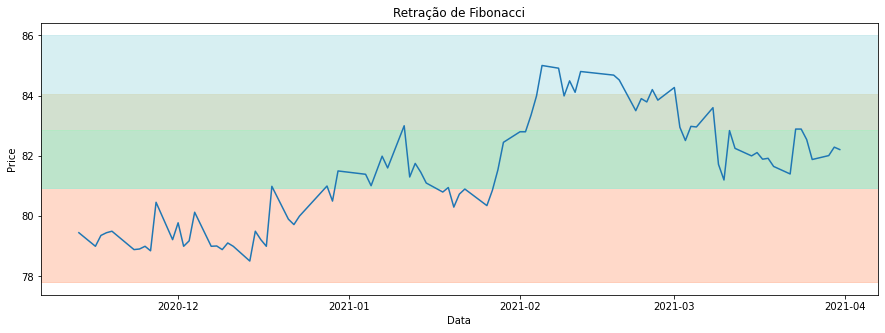

In [ ]:
#@markdown graph
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(time_fibo[-periodo_fibonacci:].reset_index()['date'], time_fibo[-periodo_fibonacci:].close)

ax.axhspan(level1, Price_Min, alpha=0.4, color='lightsalmon')
ax.axhspan(level2, level1, alpha=0.5, color='palegoldenrod')
ax.axhspan(level3, level2, alpha=0.5, color='palegreen')
ax.axhspan(Price_Max, level3, alpha=0.5, color='powderblue')

plt.ylabel("Price")
plt.xlabel("Data")

plt.title('Retração de Fibonacci')

plt.show()

## RSI ( Índice de força relativa )  
###> 70 Vende
###< 30 Compra

* mede a força do preço atual em relação aos preços anteriores

In [ ]:
periodo_RSI = 90#@param {type: "number"}

In [ ]:
#@markdown graph
delta = time['close'][-periodo_RSI:].diff()
up, down = delta.copy(), delta.copy()

up[up < 0] = 0
down[down > 0] = 0

period = 14
    
rUp = up.ewm(com=period - 1,  adjust=False).mean()
rDown = down.ewm(com=period - 1, adjust=False).mean().abs()

time['RSI_' + str(period)] = 100 - 100 / (1 + rUp / rDown)
time['RSI_' + str(period)].fillna(0, inplace=True)

layout = go.Layout(title=f'RSI {periodo_RSI}',xaxis=dict(title="Data"), yaxis=dict(title="%RSI"))
fig = go.Figure(layout = layout)
fig.add_trace(go.Scatter(x=time.reset_index()['date'][-periodo_RSI:], y=round(time['RSI_14'][-periodo_RSI:],2), mode='lines', line_width=3,name=f'RSI {periodo_RSI}',line_color='rgb(0,0,0)'))
# fig.add_trace(go.Scatter(x=time.reset_index()['date'][-120:], y=rolling_mean_50[-120:],mode='lines',name='MM(50)',opacity = 0.4))
# fig.add_trace(go.Scatter(x=time.reset_index()['date'][-120:], y=rolling_mean_20[-120:],mode='lines',name='MM(20)',opacity = 0.6))
# fig.add_trace(go.Scatter(x=time.reset_index()['date'][-120:], y=rolling_mean_10[-120:],mode='lines',name='MM(10)',opacity = 0.8))
fig.update_layout(autosize=False,width=1000,height=800,)

fig.show()

## Pivôs

In [ ]:
periodo_pivo = 20#@param {type: "number"}

In [ ]:
#@markdown Graph
time['PP'] = pd.Series((time['high'] + time['low'] + time['close']) /3)  
time['R1'] = pd.Series(2 * time['PP'] - time['low'])  
time['S1'] = pd.Series(2 * time['PP'] - time['high'])  
time['R2'] = pd.Series(time['PP'] + time['high'] - time['low'])  
time['S2'] = pd.Series(time['PP'] - time['high'] + time['low']) 

layout = go.Layout(title=f'Pivô',xaxis=dict(title="Data"), yaxis=dict(title="Preço"))
fig = go.Figure(layout = layout)
fig.add_trace(go.Scatter(x=time.reset_index()['date'][-periodo_pivo:], y=round(time['close'][-periodo_pivo:],2), mode='lines', line_width=3,name=f'preço real',line_color='rgb(0,0,0)'))
fig.add_trace(go.Scatter(x=time.reset_index()['date'][-periodo_pivo:], y=round(time['PP'][-periodo_pivo:],2), mode='lines', line_width=1,name=f'Ponto do pivô',line_color='rgb(0,128,0)'))
fig.add_trace(go.Scatter(x=time.reset_index()['date'][-periodo_pivo:], y=round(time['R1'][-periodo_pivo:],2), mode='lines', line_width=1,name=f'Resistência 1',line_color='rgb(100,149,237)'))
fig.add_trace(go.Scatter(x=time.reset_index()['date'][-periodo_pivo:], y=round(time['S1'][-periodo_pivo:],2), mode='lines', line_width=1,name=f'Suporte 1',line_color='rgb(100,149,237)'))
fig.add_trace(go.Scatter(x=time.reset_index()['date'][-periodo_pivo:], y=round(time['R2'][-periodo_pivo:],2), mode='lines', line_width=1,name=f'Resistência 2',line_color='rgb(255,0,0)'))
fig.add_trace(go.Scatter(x=time.reset_index()['date'][-periodo_pivo:], y=round(time['S2'][-periodo_pivo:],2), mode='lines', line_width=1,name=f'Suporte 2',line_color='rgb(255,0,0)'))
fig.update_layout(autosize=False,width=1000,height=800,)

fig.show()

## Bolinger Band

In [ ]:
periodo_bolinger = 180#@param {type: "number"}

In [ ]:
#@markdown graph
time['MA20'] = time['close'].rolling(20).mean()
time['20 Day STD'] = time['close'].rolling(window=20).std()
time['Upper Band'] = time['MA20'] + (time['20 Day STD'] * 2)
time['Lower Band'] = time['MA20'] - (time['20 Day STD'] * 2)

layout = go.Layout(title=f'Banda de Bolinger',xaxis=dict(title="Data"), yaxis=dict(title="Preço"))
fig = go.Figure(layout = layout)
fig.add_trace(go.Scatter(x=time.reset_index()['date'][-periodo_bolinger:], y=round(time['Upper Band'][-periodo_bolinger:],2), mode='lines', line_width=1,name=f'Banda superior',line_color='rgb(255,0,0)'))
fig.add_trace(go.Scatter(x=time.reset_index()['date'][-periodo_bolinger:], y=round(time['Lower Band'][-periodo_bolinger:],2), mode='lines', line_width=1,name=f'Banda inferior',line_color='rgb(255,0,0)',fill= 'tonexty', fillcolor ="rgba(255, 0, 0, 0.1)",opacity=0.2))
fig.add_trace(go.Scatter(x=time.reset_index()['date'][-periodo_bolinger:], y=round(time['close'][-periodo_bolinger:],2), mode='lines', line_width=3,name=f'preço real',line_color='rgb(0,0,0)'))
fig.add_trace(go.Scatter(x=time.reset_index()['date'][-periodo_bolinger:], y=round(time['MA20'][-periodo_bolinger:],2), mode='lines', line_width=2,name=f'MM 20',line_color='rgb(0,128,0)'))
fig.update_layout(autosize=False,width=1000,height=800,)

fig.show()

## Previsão do futuro

In [ ]:
#@markdown Previsão fbprophet
time = time.reset_index()
time = time[['date','close']]
time.columns = ['ds','y']

#Modelling
m = Prophet()
m.fit(time[-360:])
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future[-30:])

from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
plot_components_plotly(m, forecast)


In [ ]:
#@markdown Previsão LSTM
import stocker
predict = stocker.predict.tomorrow(nome_do_ativo)

print('Previsão para o dia:',f'{predict[2]}','é que a ação feche no valor de: R$',f'{predict[0]}')
print('+- R$',f'{round(((predict[1]) * 100) / predict[0],2)}')

Previsão para o dia: 2021-04-01 é que a ação feche no valor de: R$ 81.92
+- R$ 0.75


# COMPARAÇÃO ENTRE MÚLTIPLOS ATIVOS

In [ ]:
nome_do_ativo1 = "CGAS3"#@param {type: "string"}
nome_do_ativo1 = str(nome_do_ativo1 + '.SA')

nome_do_ativo2 = "CSMG3"#@param {type: "string"}
nome_do_ativo2 = str(nome_do_ativo2 + '.SA')

nome_do_ativo3 = "SAPR11"#@param {type: "string"}
nome_do_ativo3 = str(nome_do_ativo3 + '.SA')

nome_do_ativo4 = "SBSP3"#@param {type: "string"}
nome_do_ativo4 = str(nome_do_ativo4 + '.SA')

In [ ]:
#@markdown import
df = Ticker([nome_do_ativo1,nome_do_ativo2,nome_do_ativo3,nome_do_ativo4],country='Brazil')
time = df.history( start='2018-01-01', end = (dt.datetime.today() + dt.timedelta(days=1)).strftime(format='20%y-%m-%d'))

In [ ]:
#@markdown todos ativos
lista = get_data()
todos = pd.DataFrame(flatten(lista).keys()).transpose()
todos.columns = todos.iloc[0]

for i in range(len(lista)):
  todos = pd.concat([todos,pd.DataFrame(lista[i]).transpose()])

todos = todos.iloc[1:]
todos['P/L'] = todos['P/L'].str.replace('.','')
todos['DY'] = todos['DY'].str.replace('%','')
todos['Liq.2m.'] = todos['Liq.2m.'].str.replace('.','')
todos['Pat.Liq'] = todos['Pat.Liq'].str.replace('.','')
todos = todos.replace(',','.', regex=True)
todos = todos.apply(pd.to_numeric,errors='ignore')

comparar = todos.loc[todos.index.isin([nome_do_ativo1[:5],nome_do_ativo2[:5],nome_do_ativo3[:5],nome_do_ativo4[:5]])]
comparar

,cotacao,P/L,P/VP,PSR,DY,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ.Circ.Liq.,EV/EBIT,EBITDA,Mrg. Ebit,Mrg.Liq.,Liq.Corr.,ROIC,ROE,Liq.2m.,Pat.Liq,Div.Brut/Pat.,Cresc.5a
CSMG3,15.01,6.99,0.88,1.068,18.75,0.485,9.26,4.37,-1.72,6.65,4.45,24.45%,15.28%,1.44,12.15%,12.65%,38.986.400.00,6.456.610.000.00,0.59,7.66%
CGAS3,150.00,17.28,33.69,2.390,5.66,1.872,32.29,10.21,-3.43,13.00,10.88,23.41%,13.83%,1.17,24.44%,195.00%,12.142.00,590.052.000.00,11.94,14.02%
SBSP3,41.15,28.90,1.23,1.580,3.35,0.558,52.02,6.44,-1.33,9.51,6.49,24.56%,5.47%,1.09,9.43%,4.27%,208.142.000.00,22.793.700.000.00,0.76,6.97%


In [ ]:
#@markdown DY
layout = go.Layout(title="DY",xaxis=dict(title="Ativo"), yaxis=dict(title="DY %"))
fig = go.Figure(layout = layout)
fig.add_trace(go.Bar(x=comparar.sort_values('DY',ascending=True).index, y=comparar.sort_values('DY',ascending=True)['DY'] ))

fig.update_layout(autosize=False,width=1000,height=400,)

fig.show()

In [ ]:
#@markdown P/L
layout = go.Layout(title="P/L",xaxis=dict(title="Ativo"), yaxis=dict(title="P/L"))
fig = go.Figure(layout = layout)
fig.add_trace(go.Bar(x=comparar.sort_values('P/L',ascending=True).index, y=comparar.sort_values('P/L',ascending=True)['P/L'] ))

fig.update_layout(autosize=False,width=1000,height=400,)

fig.show()

In [ ]:
#@markdown P/VP
layout = go.Layout(title="P/VP",xaxis=dict(title="Ativo"), yaxis=dict(title="P/VP"))
fig = go.Figure(layout = layout)
fig.add_trace(go.Bar(x=comparar.sort_values('P/VP',ascending=True).index, y=comparar.sort_values('P/VP',ascending=True)['P/VP'] ))

fig.update_layout(autosize=False,width=1000,height=400,)

fig.show()

In [ ]:
#@markdown P/L x P/VP
layout = go.Layout(title="P/L X P/VP",xaxis=dict(title="Ativo"), yaxis=dict(title="P/L X P/VP"))
fig = go.Figure(layout = layout)
fig.add_trace(go.Bar(x=comparar.index, y=comparar['P/L'] * comparar['P/VP'] ))

fig.update_layout(autosize=False,width=1000,height=400,)

fig.show()

## Retorno acumulado

In [ ]:
periodo_inicio = 360#@param {type: "number"}

In [ ]:
#@markdown graph
ret = time.reset_index()
layout = go.Layout(title="Retorno acumulado",xaxis=dict(title="Data"), yaxis=dict(title="Retorno"))
fig = go.Figure(layout = layout)
for i in range(len(ret['symbol'].unique())):
  fig.add_trace(go.Scatter(x=ret.loc[ret['symbol']==ret['symbol'].unique()[i]][-periodo_inicio:]['date'], y=ret.loc[ret['symbol']==ret['symbol'].unique()[i]][-periodo_inicio:]['close'].pct_change().cumsum(),mode='lines',name=ret.reset_index()['symbol'].unique()[i]))


fig.update_layout(autosize=False,width=1000,height=800,)

fig.show()

## Médias móveis 50

In [ ]:
#@markdown graph
rolling_50  = time['close'].rolling(window=50)
rolling_mean_50 = rolling_50.mean()
rolling_mean_50 = pd.DataFrame(rolling_mean_50.reset_index())
# mm50 = time.reset_index()


layout = go.Layout(title="MÉDIAS MÓVEIS 50",xaxis=dict(title="Data"), yaxis=dict(title="Preço R$"))
fig = go.Figure(layout = layout)
for i in range(len(rolling_mean_50['symbol'].unique())):
  fig.add_trace(go.Scatter(x=rolling_mean_50.loc[rolling_mean_50['symbol']==rolling_mean_50['symbol'].unique()[i]]['date'], y=rolling_mean_50.loc[rolling_mean_50['symbol']==rolling_mean_50['symbol'].unique()[i]]['close'],mode='lines',name=time.reset_index()['symbol'].unique()[i]))


fig.update_layout(autosize=False,width=1000,height=800,)

fig.show()

## Médias móveis 20

In [ ]:
#@markdown graph
rolling_50  = time['close'].rolling(window=20)
rolling_mean_50 = rolling_50.mean()
rolling_mean_50 = pd.DataFrame(rolling_mean_50.reset_index())
# mm50 = time.reset_index()


layout = go.Layout(title="MÉDIAS MÓVEIS 20",xaxis=dict(title="Data"), yaxis=dict(title="Preço R$"))
fig = go.Figure(layout = layout)
for i in range(len(rolling_mean_50['symbol'].unique())):
  fig.add_trace(go.Scatter(x=rolling_mean_50.loc[rolling_mean_50['symbol']==rolling_mean_50['symbol'].unique()[i]]['date'], y=rolling_mean_50.loc[rolling_mean_50['symbol']==rolling_mean_50['symbol'].unique()[i]]['close'],mode='lines',name=time.reset_index()['symbol'].unique()[i]))


fig.update_layout(autosize=False,width=1000,height=800,)

fig.show()

## Volatilidade

In [ ]:
#@markdown volatilidade
#volatilidade
TRADING_DAYS = 360
returns = np.log(time['close']/time['close'].shift(1))
returns.fillna(0, inplace=True)
volatility = returns.rolling(window=TRADING_DAYS).std()*np.sqrt(TRADING_DAYS)
vol = pd.DataFrame(volatility).reset_index()
vol = vol.dropna()

layout = go.Layout(title=f"Volatilidade",xaxis=dict(title="Data"), yaxis=dict(title="Volatilidade"))
fig = go.Figure(layout = layout)
for i in range(len(vol['symbol'].unique())):
  fig.add_trace(go.Scatter(x=vol.loc[vol['symbol']==vol['symbol'].unique()[i]]['date'], y=vol.loc[vol['symbol']==vol['symbol'].unique()[i]]['close'],name=vol['symbol'].unique()[i] ))

fig.update_layout(autosize=False,width=1000,height=400,)

fig.show()

## Sharp

In [ ]:
#@markdown Sharp ratio
#sharp
#sharpe ratio
sharpe_ratio = returns.mean()/volatility
sharpe = pd.DataFrame(sharpe_ratio).reset_index()
sharpe = sharpe.dropna()

layout = go.Layout(title=f"SHARP (Risco / Volatilidade)",xaxis=dict(title="Data"), yaxis=dict(title="Sharp"))
fig = go.Figure(layout = layout)
for i in range(len(sharpe['symbol'].unique())):
  fig.add_trace(go.Scatter(x=sharpe.loc[sharpe['symbol']==sharpe['symbol'].unique()[i]]['date'], y=sharpe.loc[sharpe['symbol']==sharpe['symbol'].unique()[i]]['close'],name=sharpe['symbol'].unique()[i] ))

fig.update_layout(autosize=False,width=1000,height=400,)

fig.show()

## Correlação

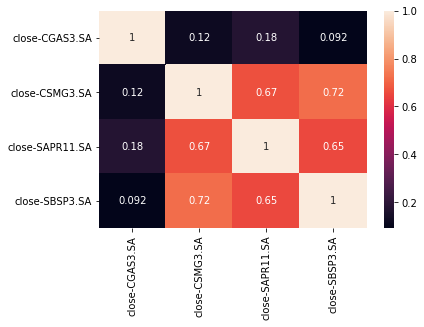

In [ ]:
#@markdown Correlação
time = time.reset_index()
time = time[['symbol','date','close']]
df_1 = time.loc[time['symbol'] == time['symbol'].unique()[0]]
df_1 = df_1.set_index('date')
df_1.columns = df_1.columns.values + '-' + df_1.symbol.unique() 
df_1.drop(df_1.columns[0],axis=1,inplace=True)
df_2 = time.loc[time['symbol'] == time['symbol'].unique()[1]]
df_2 = df_2.set_index('date')
df_2.columns = df_2.columns.values + '-' + df_2.symbol.unique() 
df_2.drop(df_2.columns[0],axis=1,inplace=True)
df_3 = time.loc[time['symbol'] == time['symbol'].unique()[2]]
df_3 = df_3.set_index('date')
df_3.columns = df_3.columns.values + '-' + df_3.symbol.unique() 
df_3.drop(df_3.columns[0],axis=1,inplace=True)
df_4 = time.loc[time['symbol'] == time['symbol'].unique()[3]]
df_4 = df_4.set_index('date')
df_4.columns = df_4.columns.values + '-' + df_4.symbol.unique() 
df_4.drop(df_4.columns[0],axis=1,inplace=True)

merged = pd.merge(pd.merge(pd.merge(df_1,df_2,left_on=df_1.index,right_on=df_2.index,how='left'),df_3,left_on='key_0',right_on=df_3.index,how='left'),df_4,left_on='key_0',right_on=df_4.index,how='left').rename({'key_0':'date'},axis=1).set_index('date')

retscomp = merged.pct_change()


sns.heatmap(retscomp.corr(),annot=True)

## Mapa de risco
####Quanto mais pra baixo menor o risco e quanto mais para a direita maior o retorno esperado

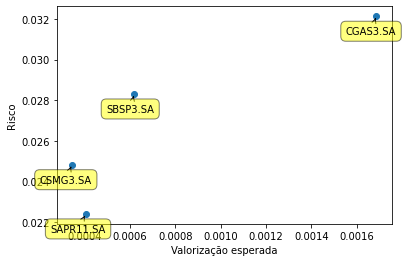

In [ ]:
#@markdown Valorização x Risco

retscomp.columns = nome_do_ativo1,nome_do_ativo2,nome_do_ativo3,nome_do_ativo4

plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Valorização esperada')
plt.ylabel('Risco')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

# EXPLORANDO NOVOS ATIVOS

#### Filtros

In [ ]:
PL_mínimo = 10#@param {type: "number"}
PL_máximo = 15#@param {type: "number"}
PVP_mínimo = 0.7#@param {type: "number"}
PVP_máximo = 1.8#@param {type: "number"}
DY_mínimo = 2.5#@param {type: "number"}
DY_máximo = 30#@param {type: "number"}

todos.loc[(todos['P/L']>= PL_mínimo) & (todos['P/L']<= PL_máximo) & (todos['P/VP']>= PVP_mínimo) & (todos['P/VP']<= PVP_máximo) & (todos['DY']>= DY_mínimo) & (todos['DY']<= DY_máximo)]

,cotacao,P/L,P/VP,PSR,DY,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ.Circ.Liq.,EV/EBIT,EBITDA,Mrg. Ebit,Mrg.Liq.,Liq.Corr.,ROIC,ROE,Liq.2m.,Pat.Liq,Div.Brut/Pat.,Cresc.5a
ABCB4,14.84,10.18,0.76,0.000,3.34,0.000,0.00,0.00,0.00,0.00,0.00,0.00%,0.00%,0.00,0.00%,7.51%,12.841.700.00,4.288.260.000.00,0.00,-34.30%
TKNO4,46.99,10.82,0.73,0.759,4.08,0.575,1.40,6.50,1.60,4.64,3.74,11.68%,7.02%,3.59,11.83%,6.72%,9.984.45,190.417.000.00,0.02,12.58%
TRIS3,9.93,10.89,1.60,2.108,4.32,0.851,1.51,10.53,2.59,10.88,10.83,20.03%,20.89%,3.68,10.69%,14.65%,16.408.600.00,1.161.050.000.00,0.47,31.34%
BGIP3,39.00,10.97,1.22,0.000,2.54,0.000,0.00,0.00,0.00,0.00,0.00,0.00%,0.00%,0.00,0.00%,11.14%,1.115.57,487.808.000.00,0.00,9.59%
ENAT3,15.73,12.08,1.42,3.595,7.26,0.913,2.85,13.02,11.61,8.29,3.16,27.62%,29.77%,3.72,11.92%,11.79%,35.619.300.00,2.935.820.000.00,0.08,27.70%
BBDC3,23.98,12.86,1.48,0.000,2.52,0.000,0.00,0.00,0.00,0.00,0.00,0.00%,0.00%,0.00,0.00%,11.51%,150.763.000.00,143.703.000.000.00,0.00,-9.27%
BRAP3,58.11,13.79,1.80,0.000,3.13,1.790,53.21,-1.121.51,54.33,-1.118.04,-1.118.04,0.00%,0.00%,11.80,-0.16%,13.03%,2.556.950.00,11.254.800.000.00,0.00,0.00%


In [ ]:
import cufflinks as cf

In [ ]:
!pip install chart_studio

     |████████████████████████████████| 71kB 4.5MB/s 


In [ ]:
df

In [ ]:
df = cf.datagen.ohlc()
qf = cf.QuantFig(df)
qf.add_bollinger_bands()
qf.iplot()

KeyboardInterrupt: ignored